<a href="https://colab.research.google.com/github/AdityaJ9082/NLP/blob/main/marathi_to_english_seq2seq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import string
from string import digits
import re
from sklearn.utils import shuffle
from keras.preprocessing.sequence import pad_sequences
from keras.layers import LSTM, Input, Dense,Embedding
from keras.models import Model,load_model
from keras.utils import plot_model
from keras.preprocessing.text import one_hot
from keras.preprocessing.text import Tokenizer
from keras.models import model_from_json
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
c=0
english_sentences=[]
marathi_input_sentences=[]
marathi_target_sentences=[]
for i in open('mar.txt','r'):
  # print(i)
  # c+=1
  f=i.split('\t')
  # print(f)
  # if c==2:
  #   break
  # f=i.split('/t')
  # print(f)

  english_sentences.append(f[0])
  marathi_input='<sos> '+f[1]
  marathi_target=f[1]+' <eos>'
  marathi_input_sentences.append(marathi_input)
  marathi_target_sentences.append(marathi_target)



In [ ]:
marathi_input_sentences[:10]

['<sos> जा.',
 '<sos> पळ!',
 '<sos> धाव!',
 '<sos> पळा!',
 '<sos> धावा!',
 '<sos> कोण?',
 '<sos> वाह!',
 '<sos> खाली वाका!',
 '<sos> आग!',
 '<sos> फायर!']

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
a='!"#$%&\'()*+,-./:;?@[\\]^_`{|}~='

In [ ]:
marathi_target_sentences[:10]

['जा. <eos>',
 'पळ! <eos>',
 'धाव! <eos>',
 'पळा! <eos>',
 'धावा! <eos>',
 'कोण? <eos>',
 'वाह! <eos>',
 'खाली वाका! <eos>',
 'आग! <eos>',
 'फायर! <eos>']

In [ ]:
df=pd.DataFrame({'English':english_sentences,'Marathi_input':marathi_input_sentences,'Marathi_target':marathi_target_sentences})

In [ ]:
df

,English,Marathi_input,Marathi_target
0,Go.,<sos> जा.,जा. <eos>
1,Run!,<sos> पळ!,पळ! <eos>
2,Run!,<sos> धाव!,धाव! <eos>
3,Run!,<sos> पळा!,पळा! <eos>
4,Run!,<sos> धावा!,धावा! <eos>
...,...,...,...
32406,I think I've already met you.,<sos> मला वाटतं मी तुला आधीच भेटले आहे.,मला वाटतं मी तुला आधीच भेटले आहे. <eos>
32407,I think I've already met you.,<sos> मला वाटतं मी तुम्हाला आधीच भेटले आहे.,मला वाटतं मी तुम्हाला आधीच भेटले आहे. <eos>
32408,I think I've already met you.,<sos> मला वाटतं मी तुम्हाला आधीच भेटलो आहे.,मला वाटतं मी तुम्हाला आधीच भेटलो आहे. <eos>
32409,I think about that every day.,<sos> मी त्याबद्दल दररोज विचार करतो.,मी त्याबद्दल दररोज विचार करतो. <eos>


In [ ]:
english_text=df['English'].values[:10000]
marathi_input_text=df['Marathi_input'].values[:10000]
marathi_target_text=df['Marathi_target'].values[:10000]

In [ ]:
english_text[:10]

array(['Go.', 'Run!', 'Run!', 'Run!', 'Run!', 'Who?', 'Wow!', 'Duck!',
       'Fire!', 'Fire!'], dtype=object)

In [ ]:
english_text=[text.lower() for text in english_text]
marathi_input_text=[text.lower() for text in marathi_input_text]
marathi_target_text=[text.lower() for text in marathi_target_text]

def remove_punct(text):
  new=str.maketrans('','',a)
  new_text=[]
  for i in text:
    text_withoutpunct=[t.translate(new) for t in i.split(' ')]
    new_text.append(' '.join(text_withoutpunct))
  return new_text

english_text=remove_punct(english_text)
marathi_input_text=remove_punct(marathi_input_text)
marathi_target_text=remove_punct(marathi_target_text)

remove_digits = str.maketrans('', '', digits)
removed_digits_text = []
for sent in english_text:
  sentance = [w.translate(remove_digits) for w in sent.split(' ')]
  removed_digits_text.append(' '.join(sentance))
english_text = removed_digits_text

marathi_input_text = [re.sub("[२३०८१५७९४६]","",x) for x in marathi_input_text]
marathi_target_text = [re.sub("[२३०८१५७९४६]","",x) for x in marathi_target_text]

english_text=[x.strip() for x in english_text]
marathi_input_text= [x.strip() for x in marathi_input_text]
marathi_target_text= [x.strip() for x in marathi_target_text]



In [ ]:
english_text[:10]

['go', 'run', 'run', 'run', 'run', 'who', 'wow', 'duck', 'fire', 'fire']

In [ ]:
tokenize_ip=Tokenizer()

In [ ]:
tokenize_ip.fit_on_texts(english_text)
english_text=tokenize_ip.texts_to_sequences(english_text)

In [ ]:
vocab_english=len(tokenize_ip.word_index)

In [ ]:
tokenize_op=Tokenizer(filters='')
tokenize_op.fit_on_texts(marathi_input_text+marathi_target_text)
marathi_input_text=tokenize_op.texts_to_sequences(marathi_input_text)
marathi_target_text=tokenize_op.texts_to_sequences(marathi_target_text)


In [ ]:
vocab_marathi=len(tokenize_op.word_index)


In [ ]:
marathi_input_text[:10]

[[1, 200],
 [1, 2232],
 [1, 2233],
 [1, 2234],
 [1, 2235],
 [1, 30],
 [1, 968],
 [1, 217, 2236],
 [1, 1196],
 [1, 2237]]

In [ ]:
max_len_eng=max(len(i) for i in english_text)

In [ ]:
max_len_mar

6

In [ ]:
max_len_mar=max(len(i) for i in marathi_input_text)

In [ ]:
english_text=pad_sequences(english_text,maxlen=max_len_eng,padding='post')
marathi_input_text=pad_sequences(marathi_input_text,maxlen=max_len_eng,padding='post')
marathi_target_text=pad_sequences(marathi_target_text,maxlen=max_len_eng,padding='post')

In [ ]:
marathi_target=np.zeros((len(english_text),max_len_mar,vocab_marathi+1))

for i,word in enumerate(marathi_target_text):
  for j,words in enumerate(word):
    marathi_target[i,j,words]=1

In [ ]:
marathi_target_text

array([[ 200,    2,    0,    0,    0,    0],
       [2232,    2,    0,    0,    0,    0],
       [2233,    2,    0,    0,    0,    0],
       ...,
       [  41,  103,  644,  882,    5,    2],
       [ 928, 3701,  267,    2,    0,    0],
       [2069, 1237,    2,    0,    0,    0]], dtype=int32)

In [ ]:
len(marathi_target[0][0])

3702

In [ ]:
vocab_marathi

3701

In [ ]:
marathi_input_text.shape

(10000, 6)

In [ ]:
EMBEDDING_DIM=100
LATENT_DIM=256
encoder_inputs=Input((max_len_eng,))
embedded_layer=Embedding(vocab_english,EMBEDDING_DIM)
embedded_encoder=embedded_layer(encoder_inputs)
lstm_layer_e=LSTM(LATENT_DIM,return_state=True)
encoded_lstm,encoder_h,encoder_c=lstm_layer_e(embedded_encoder)
encoder_states=[encoder_h,encoder_c]

decoder_inputs=Input((max_len_mar,))
decoder_layer=Embedding(vocab_marathi,EMBEDDING_DIM)
embedded_decoder=decoder_layer(decoder_inputs)
lstm_layer_d=LSTM(LATENT_DIM,return_sequences=True,return_state=True)
decoded_lstm,_,_=lstm_layer_d(embedded_decoder,initial_state=encoder_states)
dense_layer=Dense(vocab_marathi+1,activation='softmax')
decoded_dense=dense_layer(decoded_lstm)
model=Model([encoder_inputs,decoder_inputs],decoded_dense)
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 input_6 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 embedding_4 (Embedding)     (None, 6, 100)               190600    ['input_5[0][0]']             
                                                                                                  
 embedding_5 (Embedding)     (None, 6, 100)               370100    ['input_6[0][0]']             
                                                                                            

In [ ]:
r=model.fit([english_text,marathi_input_text],marathi_target,batch_size=64,epochs=50,validation_split=0.2)

Epoch 1/50
125/125 [==============================] - 11s 67ms/step - loss: 4.3421 - accuracy: 0.3560 - val_loss: 4.2101 - val_accuracy: 0.3174
Epoch 2/50
125/125 [==============================] - 2s 19ms/step - loss: 3.3417 - accuracy: 0.4814 - val_loss: 3.9917 - val_accuracy: 0.4144
Epoch 3/50
125/125 [==============================] - 2s 16ms/step - loss: 3.1978 - accuracy: 0.4984 - val_loss: 3.9488 - val_accuracy: 0.4216
Epoch 4/50
125/125 [==============================] - 2s 15ms/step - loss: 3.1269 - accuracy: 0.5033 - val_loss: 3.8359 - val_accuracy: 0.4223
Epoch 5/50
125/125 [==============================] - 2s 14ms/step - loss: 3.0472 - accuracy: 0.5086 - val_loss: 3.8211 - val_accuracy: 0.4263
Epoch 6/50
125/125 [==============================] - 3s 21ms/step - loss: 2.9545 - accuracy: 0.5206 - val_loss: 3.7469 - val_accuracy: 0.4353
Epoch 7/50
125/125 [==============================] - 2s 18ms/step - loss: 2.8501 - accuracy: 0.5328 - val_loss: 3.7272 - val_accuracy: 0.444

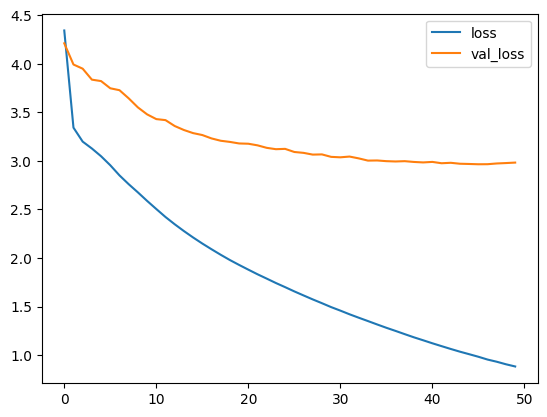

In [ ]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

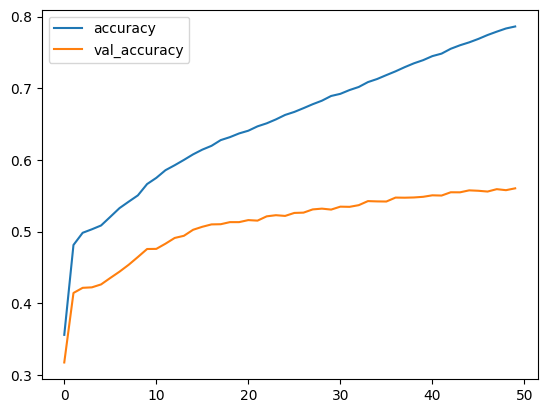

In [ ]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

In [ ]:
encoder_model=Model(encoder_inputs,encoder_states)
decoder_h=Input((LATENT_DIM,))
decoder_c=Input((LATENT_DIM,))
decoder_states_inputs=[decoder_h,decoder_c]
decoder_input=Input((1,))
embedding_output=decoder_layer(decoder_input)
lstm_output,decoder_h,decoder_c=lstm_layer_d(embedding_output,initial_state=decoder_states_inputs)#as we have only 1 input so get only that states only so we store that states and and pass it to
#next one
decoder_states=[decoder_h,decoder_c]
dense_output=dense_layer(lstm_output)
decoder_model=Model([decoder_input]+decoder_states_inputs,[dense_output]+decoder_states)





In [ ]:
decoder_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 embedding_5 (Embedding)     multiple                     370100    ['input_9[0][0]']             
                                                                                                  
 input_7 (InputLayer)        [(None, 256)]                0         []                            
                                                                                                  
 input_8 (InputLayer)        [(None, 256)]                0         []                            
                                                                                            

In [ ]:
idx2word_eng={v:k for k,v in tokenize_ip.word_index.items()}
idx2word_mar={v:k for k,v in tokenize_op.word_index.items()}

In [ ]:
marathi_target[0,0,:]

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
def gen_output(text):
  states_value=encoder_model.predict(text)#input text given to encoder will output states
  target_word=np.zeros((1,1,))#one word passed at at time
  target_word[0,0]=tokenize_op.word_index['<sos>']
  eos=tokenize_op.word_index['<eos>']
  output_sentence=[]
  for _ in range(max_len_mar):
    decoder_op,h,c=decoder_model.predict([target_word]+states_value)#one word is passed in decoder lstm so have one output only having shape [[[vocab_size]]]
    print(decoder_op)
    states_value=[h,c]
    idx=np.argmax(decoder_op[0,0,:])
    if eos==idx:
      break
    word=''
    if idx>0:
      word=idx2word_mar[idx]
      output_sentence.append(word)
    target_word[0,0]=idx
  return ' '.join(output_sentence)


In [ ]:
english_text_=df['English'].values[:10000]

In [ ]:
english_text_=[text.lower() for text in english_text_]
# marathi_input_text=[text.lower() for text in marathi_input_text]
# marathi_target_text=[text.lower() for text in marathi_target_text]

def remove_punct(text):
  new=str.maketrans('','',a)
  new_text=[]
  for i in text:
    text_withoutpunct=[t.translate(new) for t in i.split(' ')]
    new_text.append(' '.join(text_withoutpunct))
  return new_text

english_text_=remove_punct(english_text_)
# marathi_input_text=remove_punct(marathi_input_text)
# marathi_target_text=remove_punct(marathi_target_text)

remove_digits = str.maketrans('', '', digits)
removed_digits_text = []
for sent in english_text_:
  sentance = [w.translate(remove_digits) for w in sent.split(' ')]
  removed_digits_text.append(' '.join(sentance))
english_text_ = removed_digits_text

# marathi_input_text = [re.sub("[२३०८१५७९४६]","",x) for x in marathi_input_text]
# marathi_target_text = [re.sub("[२३०८१५७९४६]","",x) for x in marathi_target_text]

english_text_=[x.strip() for x in english_text_]
# marathi_input_text= [x.strip() for x in marathi_input_text]
# marathi_target_text= [x.strip() for x in marathi_target_text]


In [ ]:
while True:
  i=np.random.choice(len(english_text))
  input_seq=english_text[i:i+1]
  translation=gen_output(input_seq)
  print("Input",english_text_[i])
  print("Translation",translation)
  ans=input("Y/N")
  if ans and ans.lower().startswith('n'):
    break

1/1 [==============================] - 0s 64ms/step
[[[1.4777655e-06 2.2687648e-06 1.0076726e-04 ... 2.9210662e-06
   2.9345522e-06 2.1335013e-06]]]
1/1 [==============================] - 0s 42ms/step
[[[8.3910609e-06 6.7080975e-05 8.0479324e-05 ... 8.8654408e-05
   7.3590716e-05 6.5165841e-05]]]
1/1 [==============================] - 0s 46ms/step
[[[3.8525890e-04 5.1612147e-05 4.3146724e-07 ... 5.3032723e-05
   4.3873064e-05 3.4164954e-05]]]
1/1 [==============================] - 0s 55ms/step
[[[2.8483246e-06 6.4411934e-06 3.0105000e-03 ... 6.8075788e-06
   6.0727007e-06 6.2767604e-06]]]
1/1 [==============================] - 0s 32ms/step
[[[8.6205487e-11 3.2172590e-08 9.9924552e-01 ... 3.7811596e-08
   2.7913938e-08 3.8444934e-08]]]
Input i dont eat pork
Translation मी तसं करत नाही
Y/Ny
1/1 [==============================] - 0s 21ms/step
[[[3.4295501e-06 4.8803951e-05 2.6883818e-05 ... 6.1813997e-05
   5.3439777e-05 4.8847163e-05]]]
1/1 [==============================] - 0s 23ms/step

In [ ]:
english_text_=df['English'].values[:10000]